Ejercicio #1(comprobacion de la integral)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sympy as sp
sp.init_printing()
t,A,B,T=sp.symbols('t A B T', real=True, positive=True)#definimos las variabes simbolicas
n,m=sp.symbols('n m', integer=True)
w0=2*sp.pi/T #definimos w0 como indica el ejersicio
x1=A*sp.exp(-sp.I*n*w0*t)
x2=B*sp.exp(sp.I*m*w0*t)
integral=(1/T)* sp.integrate(sp.Abs(x1-x2)**2, (t,0,T))
ds=sp.simplify(integral) #simplificamos el resultado de la integral
display(ds)

⎧     2    2                
⎪    A  + B       for m ≠ -n
⎨                           
⎪ 2            2            
⎩A  - 2⋅A⋅B + B   otherwise 

ejercicio #2(discretizacion)


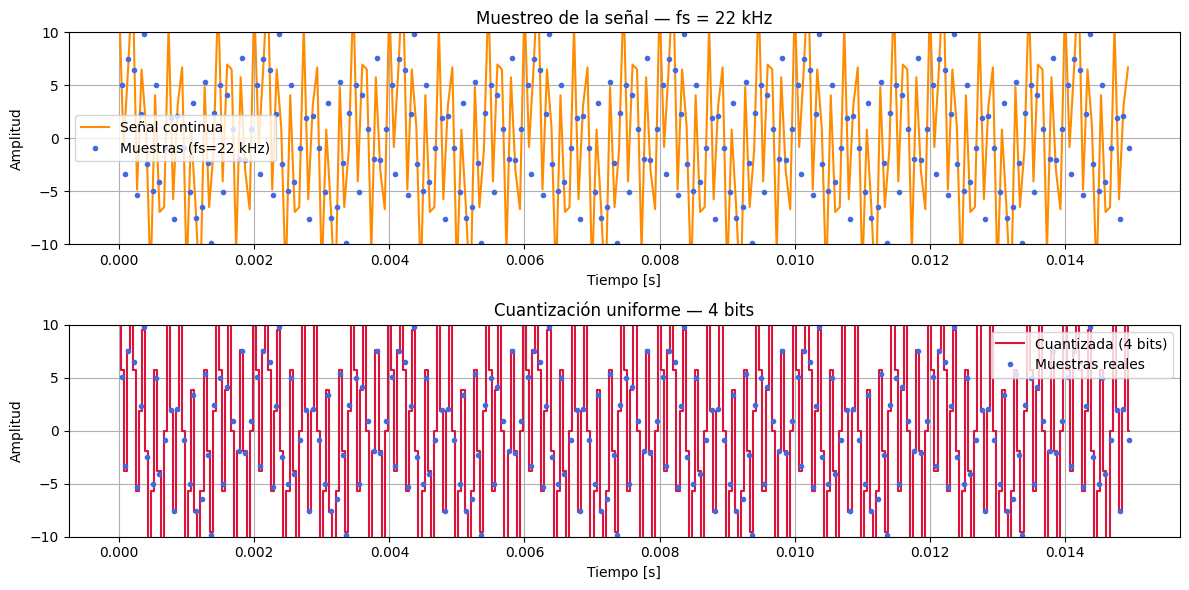

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A1, f1 = 3, 500
A2, f2 = 5, 1500
A3, f3 = 10, 5500
duracion = 0.015

# Señal continua (simulada)
f_cont = 15000
t = np.arange(0, duracion, 1/f_cont)
x = A1*np.cos(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.cos(2*np.pi*f3*t)

# Muestreo y cuantización
fs = 22000
bits = 4
t_m = np.arange(0, duracion, 1/fs)
x_m = A1*np.cos(2*np.pi*f1*t_m) + A2*np.sin(2*np.pi*f2*t_m) + A3*np.cos(2*np.pi*f3*t_m)

xmax = np.max(np.abs(x))
delta = 2*xmax / (2**bits)
x_q = np.clip(np.round(x_m / delta) * delta, -xmax + delta/2, xmax - delta/2)

# Gráficas
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(t, x, 'darkorange', label='Señal continua')
plt.plot(t_m, x_m, 'o', color='royalblue', markersize=3, label='Muestras (fs=22 kHz)')
plt.title('Muestreo de la señal — fs = 22 kHz')
plt.xlabel('Tiempo [s]'); plt.ylabel('Amplitud')
plt.ylim([-10,10]); plt.legend(); plt.grid(True)

plt.subplot(2,1,2)
plt.step(t_m, x_q, where='mid', color='crimson', label='Cuantizada (4 bits)')
plt.plot(t_m, x_m, 'o', color='royalblue', markersize=3, label='Muestras reales')
plt.title('Cuantización uniforme — 4 bits')
plt.xlabel('Tiempo [s]'); plt.ylabel('Amplitud')
plt.ylim([-10,10]); plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()


ejericio #4(espectro de fourier)



/tmp/ipython-input-1922358090.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  coeficientes[i] = (1/periodo) * np.trapz(integrando, tiempo)


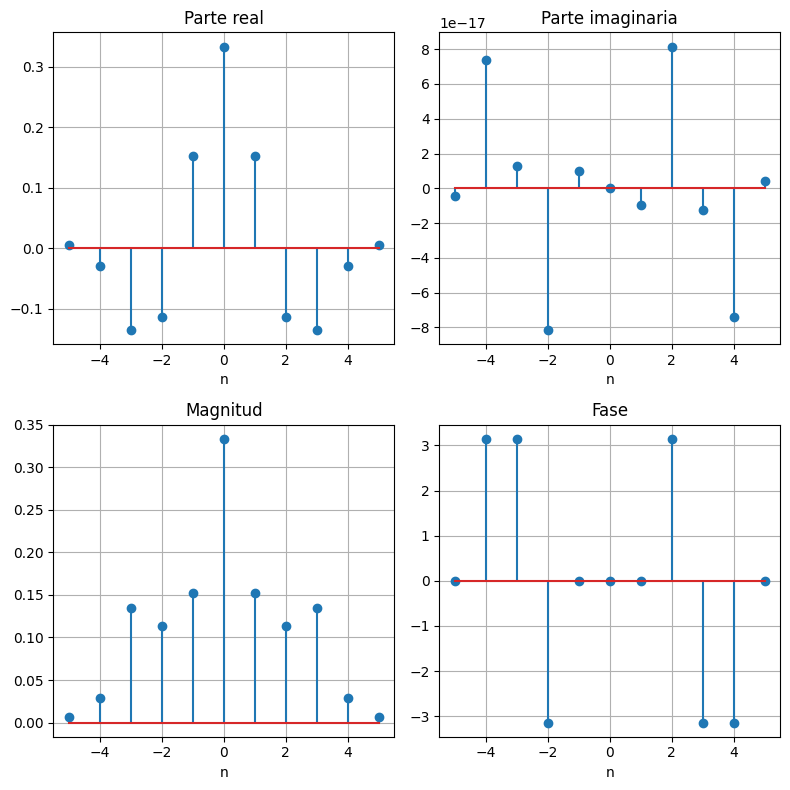

/tmp/ipython-input-1922358090.py:53: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  potencia = (1/periodo) * np.trapz(np.abs(senal)**2, tiempo)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


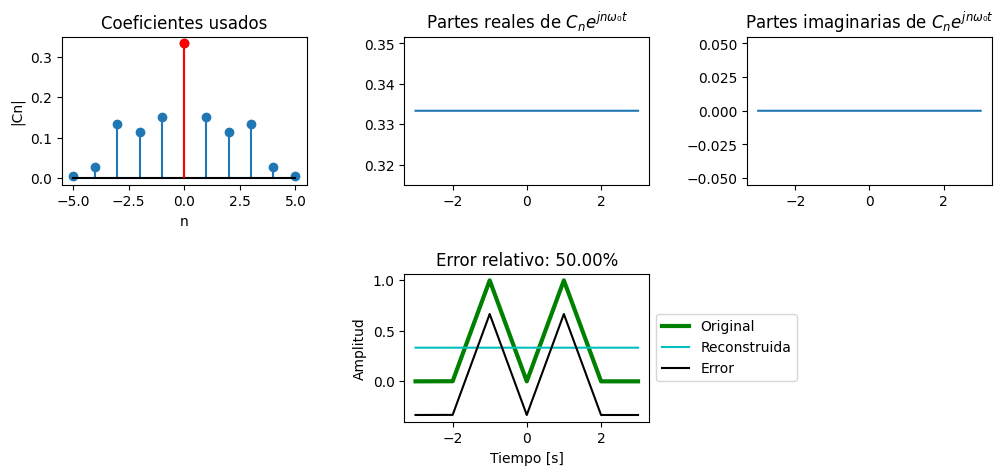

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# --- PARÁMETROS DE LA SEÑAL TRAPECIO ---
amplitud = 1.0
inicio_subida = 1.0
fin_trapecio = 2.0
periodo = 6.0

assert (periodo/2) > fin_trapecio, "El periodo debe cumplir T/2 > fin_trapecio"

frecuencia_fundamental = 1 / periodo
frecuencia_muestreo = 22000   # ← frecuencia de muestreo fija
tiempo = np.arange(-periodo/2, periodo/2, 1/frecuencia_muestreo)

# --- CONSTRUCCIÓN DE LA SEÑAL ---
senal = np.zeros_like(tiempo)

# Regiones del trapecio
r1 = (tiempo >= -fin_trapecio) & (tiempo <= -inicio_subida)
r2 = (tiempo > -inicio_subida) & (tiempo <= 0)
r3 = (tiempo >= 0) & (tiempo <= inicio_subida)
r4 = (tiempo >= inicio_subida) & (tiempo <= fin_trapecio)

senal[r1] = amplitud * (tiempo[r1] + fin_trapecio) / (fin_trapecio - inicio_subida)
senal[r2] = amplitud * (-tiempo[r2] / inicio_subida)
senal[r3] = amplitud * (tiempo[r3] / inicio_subida)
senal[r4] = amplitud * (fin_trapecio - tiempo[r4]) / (fin_trapecio - inicio_subida)

# --- CÁLCULO DE LOS COEFICIENTES DE FOURIER ---
num_armonicos = 5
w0 = 2 * np.pi / periodo
indices = np.arange(-num_armonicos, num_armonicos + 1)
bases = np.exp(1j * np.outer(tiempo, indices) * w0)

coeficientes = np.zeros(len(indices), dtype=complex)
for i, n in enumerate(indices):
    integrando = senal * np.exp(-1j * n * w0 * tiempo)
    coeficientes[i] = (1/periodo) * np.trapz(integrando, tiempo)

# --- GRAFICAR EL ESPECTRO COMPLETO ---
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0,0].stem(indices, np.real(coeficientes)); axs[0,0].set_title("Parte real")
axs[0,1].stem(indices, np.imag(coeficientes)); axs[0,1].set_title("Parte imaginaria")
axs[1,0].stem(indices, np.abs(coeficientes));  axs[1,0].set_title("Magnitud")
axs[1,1].stem(indices, np.angle(coeficientes));axs[1,1].set_title("Fase")
for a in axs.flat: a.grid(True); a.set_xlabel("n")
fig.tight_layout(); plt.show()

# --- RECONSTRUCCIÓN Y ANIMACIÓN ---
potencia = (1/periodo) * np.trapz(np.abs(senal)**2, tiempo)

fig, ax = plt.subplots(2, 3, figsize=(12, 5))

def actualizar(frame):
    # Limpiar todas las subgráficas
    for fila in ax:
        for col in fila:
            col.clear()

    seleccion = np.arange(num_armonicos - frame, num_armonicos + frame + 1)
    senal_reconstruida = bases[:, seleccion].dot(coeficientes[seleccion])
    error = 1 - np.sum(np.abs(coeficientes[seleccion])**2) / potencia

    # Magnitudes
    ax[0,0].stem(indices, np.abs(coeficientes), basefmt="k")
    ax[0,0].stem(indices[seleccion], np.abs(coeficientes[seleccion]), 'r', basefmt="k")
    ax[0,0].set_title("Coeficientes usados")
    ax[0,0].set_xlabel("n"); ax[0,0].set_ylabel("|Cn|")

    # Componentes reales
    componentes = bases[:, seleccion] * coeficientes[seleccion]
    ax[0,1].plot(tiempo, np.real(componentes))
    ax[0,1].set_title("Partes reales de $C_n e^{j n ω₀t}$")

    # Componentes imaginarias
    ax[0,2].plot(tiempo, np.imag(componentes))
    ax[0,2].set_title("Partes imaginarias de $C_n e^{j n ω₀t}$")

    # Reconstrucción y error
    error_t = senal - senal_reconstruida
    ax[1,1].plot(tiempo, senal, 'g', lw=3, label="Original")
    ax[1,1].plot(tiempo, senal_reconstruida, 'c', label="Reconstruida")
    ax[1,1].plot(tiempo, error_t, 'k', label="Error")
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,1].set_title(f"Error relativo: {100*error:.2f}%")
    ax[1,1].set_xlabel("Tiempo [s]"); ax[1,1].set_ylabel("Amplitud")

    # Apagar las gráficas vacías
    ax[1,0].axis("off"); ax[1,2].axis("off")
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

anim = animation.FuncAnimation(fig, actualizar, frames=np.arange(0, num_armonicos+1), blit=False)
rc('animation', html='jshtml')
anim
